In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"]=(12,6)
plt.rcParams['axes.unicode_minus'] = False

print('설정되어있는 폰트 글꼴: {}'.format(plt.rcParams['font.family']))

설정되어있는 폰트 글꼴: ['NanumGothic']


In [2]:
df = pd.read_csv("C:/Users/OWNER/Desktop/빅데이터 프로젝트/데이터 정제/이상치 결측치/새 폴더/on_total_ver2.csv", encoding='cp949')
df

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,OrderDate,OrderYear,OrderYearMonth,OrderMonth,...,PriceMax,time,DeliveryDate,DeliveryYear,DeliveryMonth,DeliveryDay,DeliveryHour,DeliveryMinute,DeliverySecond,DeliveryDow
0,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2210012,2510,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,2650,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
1,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2340032,2870,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,2900,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
2,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2320050,3350,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,3760,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
3,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2230012,9680,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,9770,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
4,U10001,U10001-O2020-1002,2020-07-23 22:35:08,P2250010,1240,2020-07-25 04:54:00,2020-07-23,2020,2020-07,7,...,1330,04:54:00,2020-07-25,2020,7,23,4,35,8,토요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872042,U13000,U13000-O2022-1022,2022-12-04 18:14:16,P1420050,11500,2022-12-05 04:11:00,2022-12-04,2022,2022-12,12,...,12320,04:11:00,2022-12-05,2022,12,4,4,14,16,월요일
872043,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1410042,7050,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,7230,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일
872044,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1130024,4190,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,4460,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일
872045,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1620039,12230,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,13020,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일


In [3]:
df.shape

(872047, 38)

In [5]:
### 주문 id 별 총 지불금액 통합
df_order = df.groupby('idOrder').agg({'Price':'sum'}).reset_index().rename(columns= {'Price':'TotalPrice'})
print(df_order.shape)
df_order.head()

(189301, 2)


,idOrder,TotalPrice
0,U10001-O2020-1001,18410
1,U10001-O2020-1002,15870
2,U10001-O2020-1003,5860
3,U10001-O2020-1004,17180
4,U10001-O2020-1005,36600


In [6]:
df_age = df.drop_duplicates("idOrder")
df_age.reset_index(inplace=True, drop=True)
df_age = pd.merge(df_age, df_order, on='idOrder')
df_age = df_age[['idUser', 'idOrder', 'OrderDT', 'TotalPrice', 'DeliveryDT',
       'OrderDate', 'OrderYear', 'OrderYearMonth', 'OrderMonth', 'OrderDow',
       'OrderHour', 'Gender', 'FamilyCount', 'MemberYN', 'Monetary', 'AgeGroup']]
df_age.head()

,idUser,idOrder,OrderDT,TotalPrice,DeliveryDT,OrderDate,OrderYear,OrderYearMonth,OrderMonth,OrderDow,OrderHour,Gender,FamilyCount,MemberYN,Monetary,AgeGroup
0,U10001,U10001-O2020-1001,2020-03-13 23:29:23,18410,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,금요일,23,남성,3,Y,1743760,60대
1,U10001,U10001-O2020-1002,2020-07-23 22:35:08,15870,2020-07-25 04:54:00,2020-07-23,2020,2020-07,7,목요일,22,남성,3,Y,1743760,60대
2,U10001,U10001-O2020-1003,2020-08-13 20:25:27,5860,2020-08-14 06:58:00,2020-08-13,2020,2020-08,8,목요일,20,남성,3,Y,1743760,60대
3,U10001,U10001-O2020-1004,2020-09-17 23:41:55,17180,2020-09-19 04:41:00,2020-09-17,2020,2020-09,9,목요일,23,남성,3,Y,1743760,60대
4,U10001,U10001-O2020-1005,2020-09-24 21:47:53,36600,2020-09-25 06:53:00,2020-09-24,2020,2020-09,9,목요일,21,남성,3,Y,1743760,60대


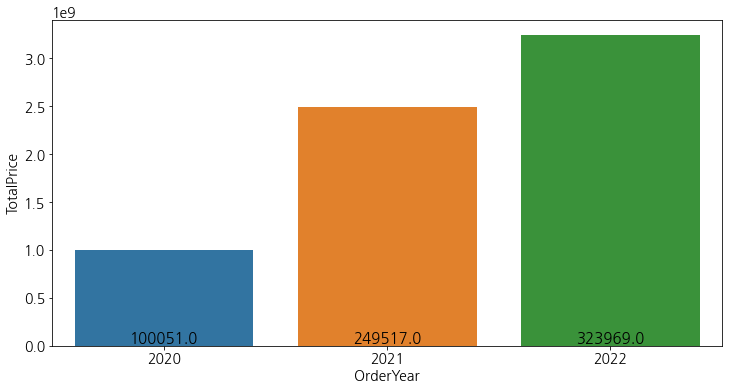

In [7]:
### 년도별 매출 그래프 생성
year_sales = df_age.groupby('OrderYear').agg({'TotalPrice':'sum'})
year_sales.reset_index(inplace=True)
ax = sns.barplot(data = year_sales, x='OrderYear', y='TotalPrice')
for p in ax.patches:
    height = p.get_height()//10000
    ax.text(p.get_x() + p.get_width() / 2., height + 10, height, ha = 'center', size = 15, verticalalignment='bottom')
# ax.set_ylim(-5, 100)
plt.show()

### 2030, 4060 고객층 별 한번 주문시 객단가 / 매출 확인
- 고객층별 영향력 혹은 구매력 확인

In [8]:
### 해당 데이터에서 각 고객별 한번 주문시 평균 객단가와 매출 파악
print(df_age[df_age.idUser=='U10001'].TotalPrice.mean())
user_price1 = df_age.groupby('idUser').agg({'TotalPrice':'mean'}).reset_index().rename(columns={'TotalPrice':'주문별 객단가'})
user_price2 = df_age.groupby('idUser').agg({'TotalPrice':'sum'}).reset_index().rename(columns={'TotalPrice':'총 주문 금액'})
user_price = pd.merge(user_price1, user_price2, on='idUser')
user_price

32700.0


,idUser,주문별 객단가,총 주문 금액
0,U10001,32700.000000,1733100
1,U10002,32758.358209,2194810
2,U10003,32950.281690,2339470
3,U10004,39221.904762,2470980
4,U10005,44553.617021,2094020
...,...,...,...
2995,U12996,36967.166667,2218030
2996,U12997,34502.463768,2380670
2997,U12998,34948.311688,2691020
2998,U12999,37726.447368,2867210


In [9]:
user_info = df_age.drop_duplicates('idUser')[['idUser','Gender', 'FamilyCount', 'MemberYN', 'AgeGroup']]
user_info.reset_index(inplace=True, drop=True)
user_info

,idUser,Gender,FamilyCount,MemberYN,AgeGroup
0,U10001,남성,3,Y,60대
1,U10002,남성,1,Y,30대
2,U10003,여성,2,N,20대
3,U10004,남성,3,Y,30대
4,U10005,여성,2,Y,20대
...,...,...,...,...,...
2995,U12996,여성,2,Y,30대
2996,U12997,남성,2,N,40대
2997,U12998,여성,0,Y,30대
2998,U12999,여성,0,Y,30대


In [10]:
df_total = pd.merge(user_price, user_info, on='idUser')
df_total

,idUser,주문별 객단가,총 주문 금액,Gender,FamilyCount,MemberYN,AgeGroup
0,U10001,32700.000000,1733100,남성,3,Y,60대
1,U10002,32758.358209,2194810,남성,1,Y,30대
2,U10003,32950.281690,2339470,여성,2,N,20대
3,U10004,39221.904762,2470980,남성,3,Y,30대
4,U10005,44553.617021,2094020,여성,2,Y,20대
...,...,...,...,...,...,...,...
2995,U12996,36967.166667,2218030,여성,2,Y,30대
2996,U12997,34502.463768,2380670,남성,2,N,40대
2997,U12998,34948.311688,2691020,여성,0,Y,30대
2998,U12999,37726.447368,2867210,여성,0,Y,30대


In [11]:
df1 = df_total.groupby('AgeGroup').agg({'주문별 객단가':'mean', '총 주문 금액':'sum'}).reset_index()
df1

,AgeGroup,주문별 객단가,총 주문 금액
0,20대,35920.375178,2189325510
1,30대,35993.547193,2671367450
2,40대,35925.775285,909769340
3,50대,35729.035504,655542370
4,60대,35659.119585,309384370


<AxesSubplot:xlabel='AgeGroup', ylabel='주문별 객단가'>

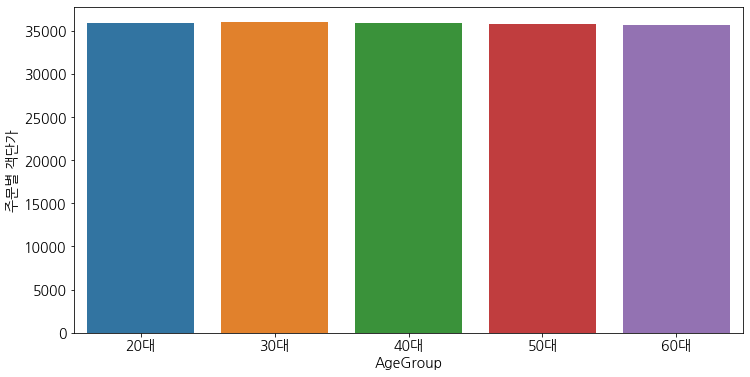

In [12]:
sns.barplot(data = df1, x='AgeGroup', y='주문별 객단가')

<AxesSubplot:xlabel='AgeGroup', ylabel='총 주문 금액'>

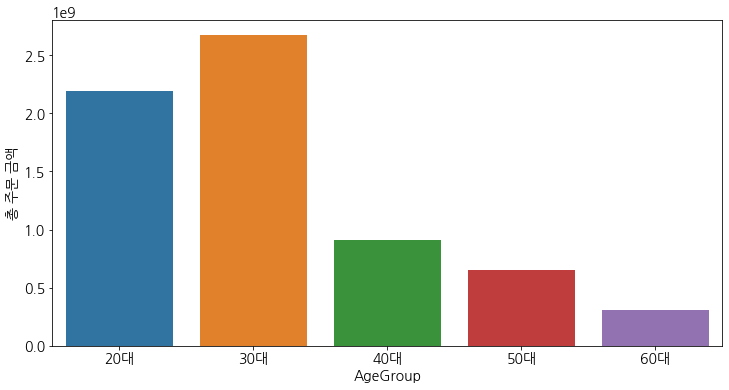

In [13]:
sns.barplot(data = df1, x='AgeGroup', y='총 주문 금액')

In [14]:
agelst = ['20대','30대']

newlst = [{'AgeGroup':'2030','주문별 객단가':df1[df1.AgeGroup.isin(agelst)]['주문별 객단가'].mean(), '총 주문 금액':df1[df1.AgeGroup.isin(agelst)]['총 주문 금액'].sum()},
         {'AgeGroup':'4060','주문별 객단가':df1[~df1.AgeGroup.isin(agelst)]['주문별 객단가'].mean(), '총 주문 금액':df1[~df1.AgeGroup.isin(agelst)]['총 주문 금액'].sum()}]
df11 = pd.DataFrame(newlst)
df11

,AgeGroup,주문별 객단가,총 주문 금액
0,2030,35956.961185,4860692960
1,4060,35771.310125,1874696080


<AxesSubplot:xlabel='AgeGroup', ylabel='주문별 객단가'>

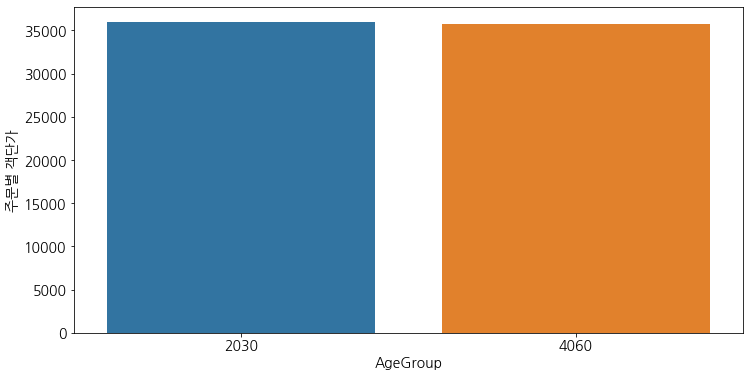

In [15]:
sns.barplot(data = df11, x='AgeGroup', y='주문별 객단가')

<AxesSubplot:xlabel='AgeGroup', ylabel='총 주문 금액'>

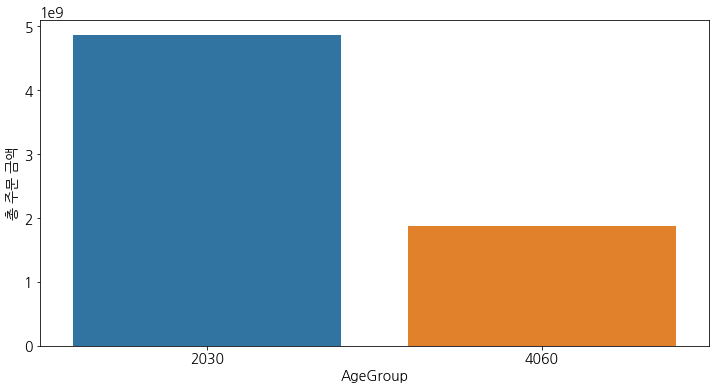

In [16]:
sns.barplot(data = df11, x='AgeGroup', y='총 주문 금액')

### 시간대별 주문량 / 평균 매출액

In [17]:
df_age.head()

,idUser,idOrder,OrderDT,TotalPrice,DeliveryDT,OrderDate,OrderYear,OrderYearMonth,OrderMonth,OrderDow,OrderHour,Gender,FamilyCount,MemberYN,Monetary,AgeGroup
0,U10001,U10001-O2020-1001,2020-03-13 23:29:23,18410,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,금요일,23,남성,3,Y,1743760,60대
1,U10001,U10001-O2020-1002,2020-07-23 22:35:08,15870,2020-07-25 04:54:00,2020-07-23,2020,2020-07,7,목요일,22,남성,3,Y,1743760,60대
2,U10001,U10001-O2020-1003,2020-08-13 20:25:27,5860,2020-08-14 06:58:00,2020-08-13,2020,2020-08,8,목요일,20,남성,3,Y,1743760,60대
3,U10001,U10001-O2020-1004,2020-09-17 23:41:55,17180,2020-09-19 04:41:00,2020-09-17,2020,2020-09,9,목요일,23,남성,3,Y,1743760,60대
4,U10001,U10001-O2020-1005,2020-09-24 21:47:53,36600,2020-09-25 06:53:00,2020-09-24,2020,2020-09,9,목요일,21,남성,3,Y,1743760,60대


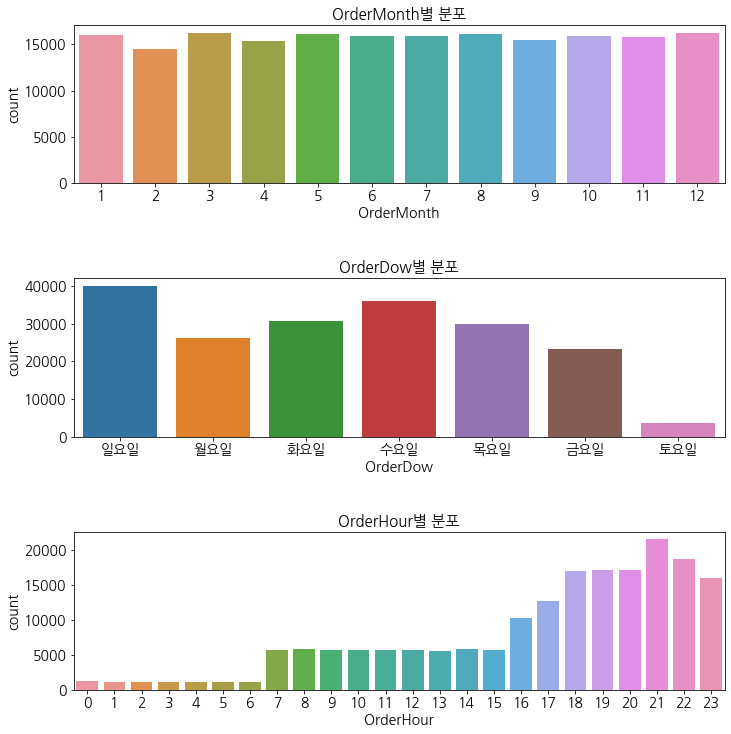

In [18]:
### 월, 요일, 시 별 주문량 그래프
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
plt.tight_layout(w_pad=1, h_pad=5)
i = 1
for col in ['OrderMonth', 'OrderDow','OrderHour']:
    plt.subplot(3, 1, i) 
    if col == 'OrderDow':
        weekdaylst = {'일요일':0, '월요일':1, '화요일':2, '수요일':3, '목요일':4, '금요일':5, '토요일':6}
        sns.countplot(data=df_age.sort_values(by='OrderDow', key=lambda col: col.map(weekdaylst)), x=col)
    else:
        sns.countplot(data=df_age, x=col)
    plt.title(col + "별 분포", fontsize=15)
    i += 1

,OrderMonth,TotalPrice
0,1,570280500
1,2,513665330
2,3,578264330
3,4,544591110
4,5,576876220
5,6,560087480
6,7,564281260
7,8,573971970
8,9,550028650
9,10,567044420


,OrderDow,TotalPrice
4,일요일,1429033950
3,월요일,923764780
6,화요일,1084596710
2,수요일,1274810200
1,목요일,1072363510
0,금요일,822205290
5,토요일,128614600


,OrderHour,TotalPrice
0,0,41591030
1,1,38381730
2,2,37175220
3,3,37689660
4,4,40530350
5,5,39751660
6,6,38934330
7,7,200433110
8,8,205207610
9,9,205523110


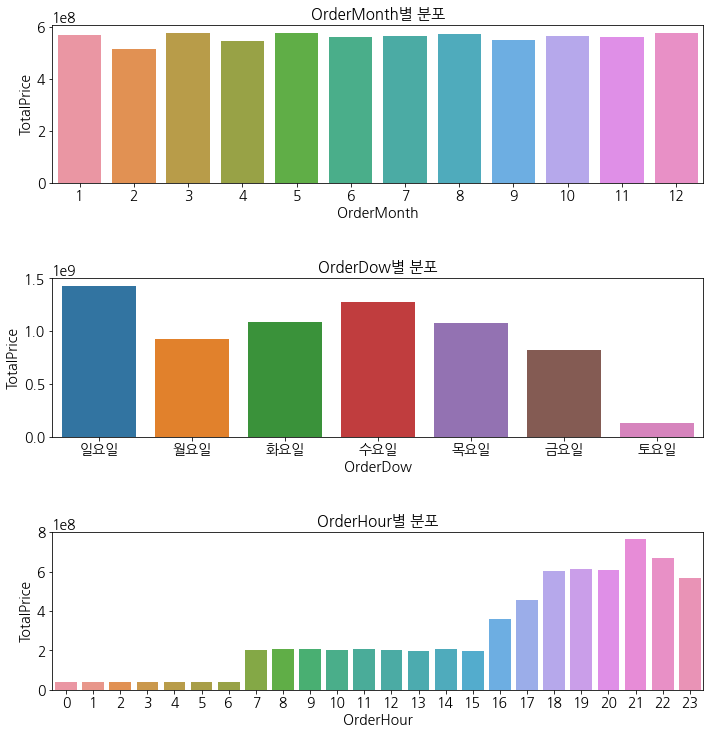

In [19]:
### 월, 요일, 시 별 평균 매출액 그래프
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
plt.tight_layout(w_pad=1, h_pad=5)
i = 1
for col in ['OrderMonth', 'OrderDow','OrderHour']:
    plt.subplot(3, 1, i) 
    if col == 'OrderDow':
        weekdaylst = {'일요일':0, '월요일':1, '화요일':2, '수요일':3, '목요일':4, '금요일':5, '토요일':6}
        graphdf = df_age.groupby(col).agg({'TotalPrice':'sum'}).reset_index().sort_values(by='OrderDow', key=lambda col: col.map(weekdaylst))
    else:
        graphdf = df_age.groupby(col).agg({'TotalPrice':'sum'}).reset_index()
    display(graphdf)
    sns.barplot(data=graphdf, x=col, y='TotalPrice')
    plt.title(col + "별 분포", fontsize=15)
    i += 1

### 연령대별 고객수

In [20]:
df_customer = pd.read_csv("C:/Users/OWNER/Desktop/빅데이터 프로젝트/데이터 정제/이상치 결측치/고객데이터 파생변수/on_user_final.csv", encoding='cp949')
df_customer

,idUser,Gender,Age,FamilyCount,MemberYN,Monetary,UserClass,AgeGroup
0,U10001,남성,64,3,Y,1743760,신규 고객,60대
1,U10002,남성,30,1,Y,2201660,잠재충성 고객,30대
2,U10003,여성,28,2,N,2351550,VIP,20대
3,U10004,남성,38,3,Y,2470980,관심필요 고객,30대
4,U10005,여성,23,2,Y,2104870,이탈 고객,20대
...,...,...,...,...,...,...,...,...
2995,U12996,여성,34,2,Y,2221920,신규 고객,30대
2996,U12997,남성,45,2,N,2392990,떠나간 VIP,40대
2997,U12998,여성,30,0,Y,2704160,떠나간 VIP,30대
2998,U12999,여성,36,0,Y,2881640,떠나간 VIP,30대


<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

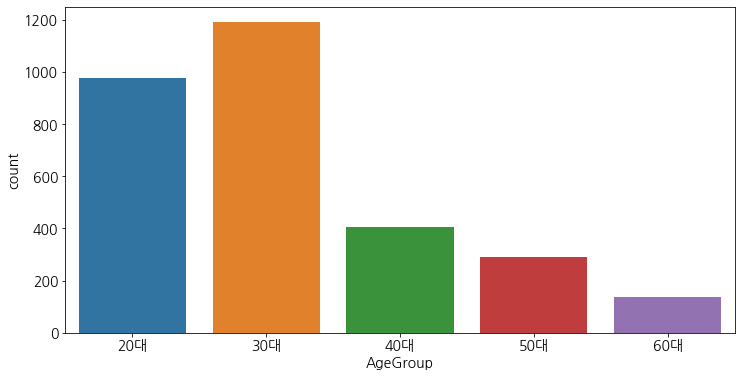

In [21]:
sns.countplot(data = df_customer.sort_values(by='AgeGroup'), x='AgeGroup')

In [22]:
df_customer.groupby('AgeGroup')['idUser'].count()

AgeGroup
20대     976
30대    1190
40대     404
50대     291
60대     139
Name: idUser, dtype: int64

### MemberYN 별 매출

In [23]:
df_age

,idUser,idOrder,OrderDT,TotalPrice,DeliveryDT,OrderDate,OrderYear,OrderYearMonth,OrderMonth,OrderDow,OrderHour,Gender,FamilyCount,MemberYN,Monetary,AgeGroup
0,U10001,U10001-O2020-1001,2020-03-13 23:29:23,18410,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,금요일,23,남성,3,Y,1743760,60대
1,U10001,U10001-O2020-1002,2020-07-23 22:35:08,15870,2020-07-25 04:54:00,2020-07-23,2020,2020-07,7,목요일,22,남성,3,Y,1743760,60대
2,U10001,U10001-O2020-1003,2020-08-13 20:25:27,5860,2020-08-14 06:58:00,2020-08-13,2020,2020-08,8,목요일,20,남성,3,Y,1743760,60대
3,U10001,U10001-O2020-1004,2020-09-17 23:41:55,17180,2020-09-19 04:41:00,2020-09-17,2020,2020-09,9,목요일,23,남성,3,Y,1743760,60대
4,U10001,U10001-O2020-1005,2020-09-24 21:47:53,36600,2020-09-25 06:53:00,2020-09-24,2020,2020-09,9,목요일,21,남성,3,Y,1743760,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189296,U13000,U13000-O2022-1019,2022-10-02 21:45:26,27440,2022-10-03 07:59:00,2022-10-02,2022,2022-10,10,일요일,21,여성,1,Y,1775830,40대
189297,U13000,U13000-O2022-1020,2022-10-09 16:49:18,33320,2022-10-10 04:17:00,2022-10-09,2022,2022-10,10,일요일,16,여성,1,Y,1775830,40대
189298,U13000,U13000-O2022-1021,2022-11-13 13:31:15,41780,2022-11-14 04:42:00,2022-11-13,2022,2022-11,11,일요일,13,여성,1,Y,1775830,40대
189299,U13000,U13000-O2022-1022,2022-12-04 18:14:16,36870,2022-12-05 04:11:00,2022-12-04,2022,2022-12,12,일요일,18,여성,1,Y,1775830,40대


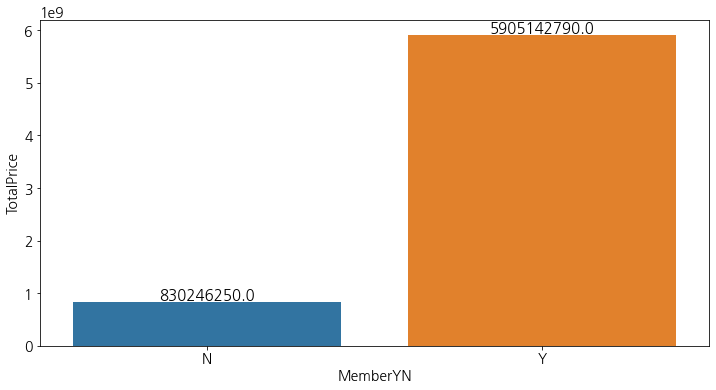

In [24]:
ax = sns.barplot(data = df_age.groupby('MemberYN').TotalPrice.sum().reset_index(), x= 'MemberYN', y='TotalPrice')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 10, height, ha = 'center', size = 15, verticalalignment='bottom')

### 가족구성원 수/ 연령대별 인기카테고리, 매출 관련

In [25]:
df

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,OrderDate,OrderYear,OrderYearMonth,OrderMonth,...,PriceMax,time,DeliveryDate,DeliveryYear,DeliveryMonth,DeliveryDay,DeliveryHour,DeliveryMinute,DeliverySecond,DeliveryDow
0,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2210012,2510,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,2650,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
1,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2340032,2870,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,2900,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
2,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2320050,3350,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,3760,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
3,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2230012,9680,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,9770,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
4,U10001,U10001-O2020-1002,2020-07-23 22:35:08,P2250010,1240,2020-07-25 04:54:00,2020-07-23,2020,2020-07,7,...,1330,04:54:00,2020-07-25,2020,7,23,4,35,8,토요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872042,U13000,U13000-O2022-1022,2022-12-04 18:14:16,P1420050,11500,2022-12-05 04:11:00,2022-12-04,2022,2022-12,12,...,12320,04:11:00,2022-12-05,2022,12,4,4,14,16,월요일
872043,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1410042,7050,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,7230,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일
872044,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1130024,4190,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,4460,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일
872045,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1620039,12230,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,13020,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일


In [26]:
df_category = df[['idUser', 'idOrder', 'OrderDT', 'ItemCode', 'Price', 'Gender',
       'Age', 'FamilyCount', 'MemberYN', 'UserClass', 'AgeGroup',
       'ItemLargeName', 'ItemMiddleName', 'ItemSmallName', 'ItemName']]
df_category.head()

,idUser,idOrder,OrderDT,ItemCode,Price,Gender,Age,FamilyCount,MemberYN,UserClass,AgeGroup,ItemLargeName,ItemMiddleName,ItemSmallName,ItemName
0,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2210012,2510,남성,64,3,Y,신규 고객,60대,신선식품,수산물,고등어,[고등어초절임 100g] 시메사바 필렛 고등어초회 고등어회 홈마카세 금상어가
1,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2340032,2870,남성,64,3,Y,신규 고객,60대,신선식품,채소류,파프리카,[프레시팜] 가정용 봉지 파프리카 특품 2입 1봉지
2,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2320050,3350,남성,64,3,Y,신규 고객,60대,신선식품,채소류,상추,[맛다름]양상추 1통
3,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2230012,9680,남성,64,3,Y,신규 고객,60대,신선식품,수산물,오징어,GS Fresh 매콤한 팔당오징어 420g
4,U10001,U10001-O2020-1002,2020-07-23 22:35:08,P2250010,1240,남성,64,3,Y,신규 고객,60대,신선식품,수산물,조기,참조기(200~400g)


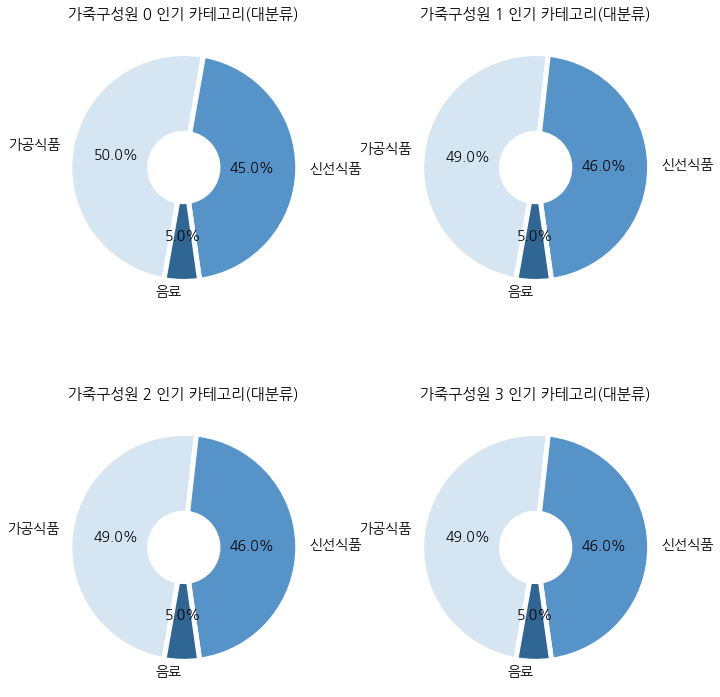

In [27]:
### 가구인원수별 인기 카테고리 파악(대분류)
fam_cate = df_category.groupby(['FamilyCount','ItemLargeName'])['idOrder'].count().reset_index().rename(columns={'idOrder':'Count'})
### 대분류 인기 카테고리 파악
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), constrained_layout=True)
plt.tight_layout(w_pad=1, h_pad=5)
i = 1
for col in [0, 1, 2, 3]:
    plt.subplot(2, 2, i) 
    graphdf = fam_cate[fam_cate.FamilyCount == col]
    cntsum = graphdf.Count.sum()
    graphdf['ratio'] = graphdf['Count'].apply(lambda x: round(x / cntsum * 100))
    colors = ['#d6e5f2', '#5593c8', '#2f6694', '#8cb6da']
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.pie(data = graphdf, x='ratio', labels='ItemLargeName', autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
    plt.title("가죽구성원 {} 인기 카테고리(대분류)".format(col), fontsize=15)
    i += 1

,FamilyCount,ItemMiddleName,Count
0,0,곡물가공,18163
1,0,과일,9120
2,0,과일가공,4289
3,0,과자/젤리,2613
4,0,김치,1276
5,0,생수,2323
6,0,수산물,8080
7,0,수산물가공,8601
8,0,음료,2521
9,0,장/양념/소스,379


,FamilyCount,ItemMiddleName,Count
15,1,곡물가공,53394
16,1,과일,27235
17,1,과일가공,12575
18,1,과자/젤리,7383
19,1,김치,3709
20,1,생수,6855
21,1,수산물,24310
22,1,수산물가공,25020
23,1,음료,7521
24,1,장/양념/소스,1133


,FamilyCount,ItemMiddleName,Count
30,2,곡물가공,55877
31,2,과일,28209
32,2,과일가공,13096
33,2,과자/젤리,7641
34,2,김치,3895
35,2,생수,7011
36,2,수산물,25243
37,2,수산물가공,26167
38,2,음료,7905
39,2,장/양념/소스,1253


,FamilyCount,ItemMiddleName,Count
45,3,곡물가공,35887
46,3,과일,18104
47,3,과일가공,8587
48,3,과자/젤리,4900
49,3,김치,2516
50,3,생수,4579
51,3,수산물,16261
52,3,수산물가공,16930
53,3,음료,4996
54,3,장/양념/소스,796


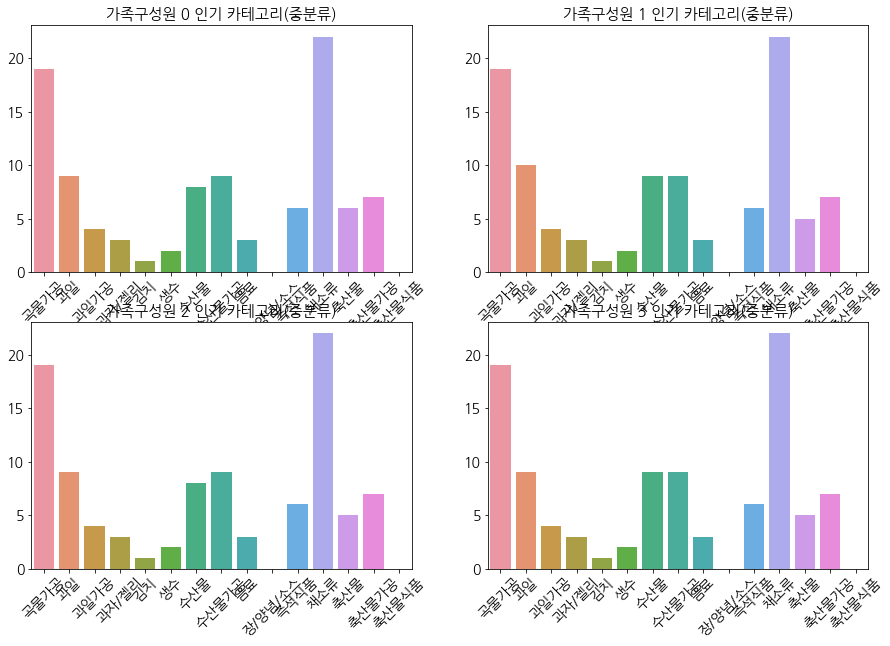

In [28]:
### 가구인원수별 인기 카테고리 파악(대분류)
fam_cate2 = df_category.groupby(['FamilyCount','ItemMiddleName'])['idOrder'].count().reset_index().rename(columns={'idOrder':'Count'})
### 중분류 인기 카테고리 파악
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
# plt.tight_layout(w_pad=1, h_pad=5)
i = 1
for col in [0, 1, 2, 3]:
    plt.subplot(2, 2, i) 
    graphdf = fam_cate2[fam_cate2.FamilyCount == col]
    display(graphdf)
    cntsum = graphdf.Count.sum()
    graphdf['ratio'] = graphdf['Count'].apply(lambda x: round(x / cntsum * 100))
    sns.barplot(x=graphdf['ItemMiddleName'].values.tolist(), y=graphdf['ratio'].values.tolist())
    plt.xticks(rotation=45)
    plt.title("가족구성원 {} 인기 카테고리(중분류)".format(col), fontsize=15)
    i += 1

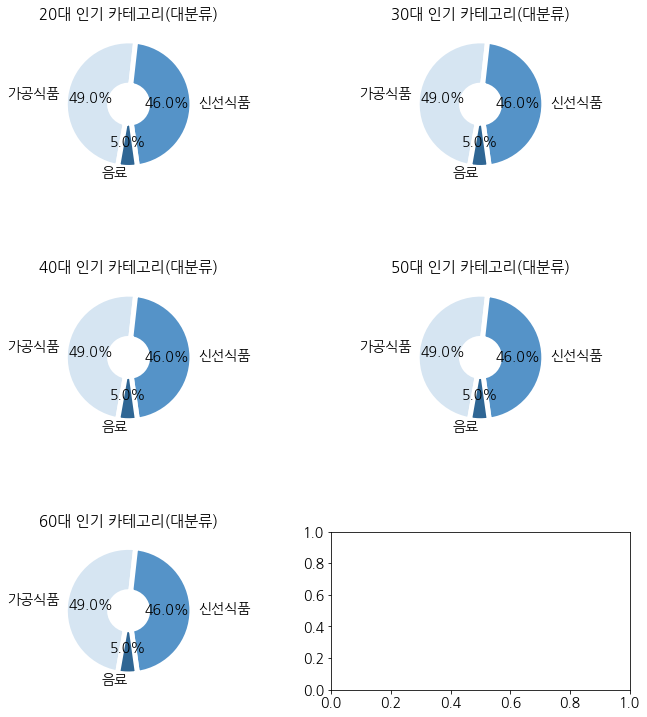

In [29]:
### 성별 인기 카테고리 파악(대분류)
age_cate = df_category.groupby(['AgeGroup','ItemLargeName'])['idOrder'].count().reset_index().rename(columns={'idOrder':'Count'})
### 대분류 인기 카테고리 파악
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
plt.tight_layout(w_pad=1, h_pad=5)
i = 1
for col in ['20대', '30대', '40대', '50대', '60대']:
    plt.subplot(3, 2, i) 
    graphdf = age_cate[age_cate.AgeGroup == col]
    cntsum = graphdf.Count.sum()
    graphdf['ratio'] = graphdf['Count'].apply(lambda x: round(x / cntsum * 100))
    colors = ['#d6e5f2', '#5593c8', '#2f6694']
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.pie(data = graphdf, x='ratio', labels='ItemLargeName', autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
    plt.title("{} 인기 카테고리(대분류)".format(col), fontsize=15)
    i += 1

In [131]:
age_cate.head()
# age_cate

,AgeGroup,ItemLargeName,Count
0,20대,가공식품,139203
1,20대,신선식품,130087
2,20대,음료,14110
3,30대,가공식품,170827
4,30대,신선식품,157637


<AxesSubplot:xlabel='ItemLargeName', ylabel='count'>

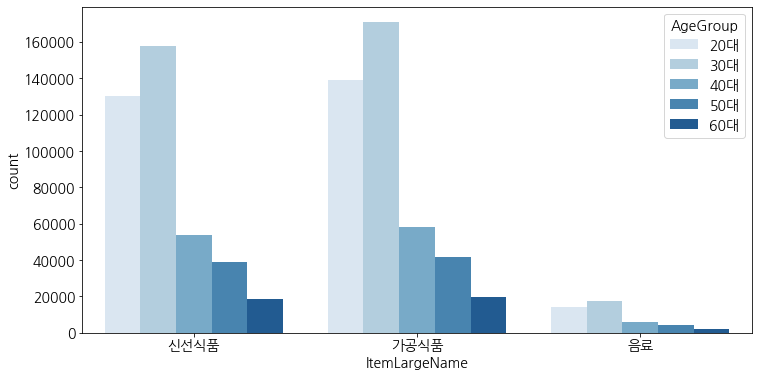

In [139]:
sns.countplot(data= df_category.sort_values(by='AgeGroup'), x='ItemLargeName', hue='AgeGroup', palette='Blues')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '채소류'),
  Text(1, 0, '과일가공'),
  Text(2, 0, '곡물가공'),
  Text(3, 0, '수산물가공'),
  Text(4, 0, '음료'),
  Text(5, 0, '과자/젤리'),
  Text(6, 0, '축산물'),
  Text(7, 0, '과일'),
  Text(8, 0, '축산물가공'),
  Text(9, 0, '생수'),
  Text(10, 0, '즉석식품'),
  Text(11, 0, '수산물'),
  Text(12, 0, '축산물식품'),
  Text(13, 0, '장/양념/소스'),
  Text(14, 0, '김치')])

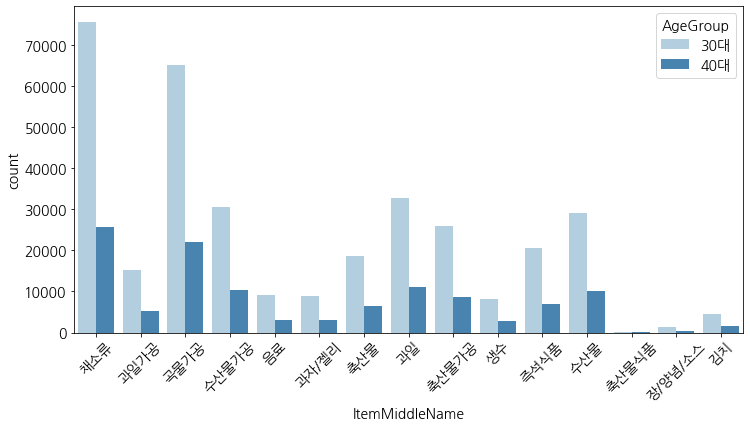

In [141]:
sns.countplot(data= df_category[df_category.AgeGroup.isin(['30대', '40대'])].sort_values(by='AgeGroup'), x='ItemMiddleName', hue='AgeGroup', palette='Blues')
plt.xticks(rotation=45)

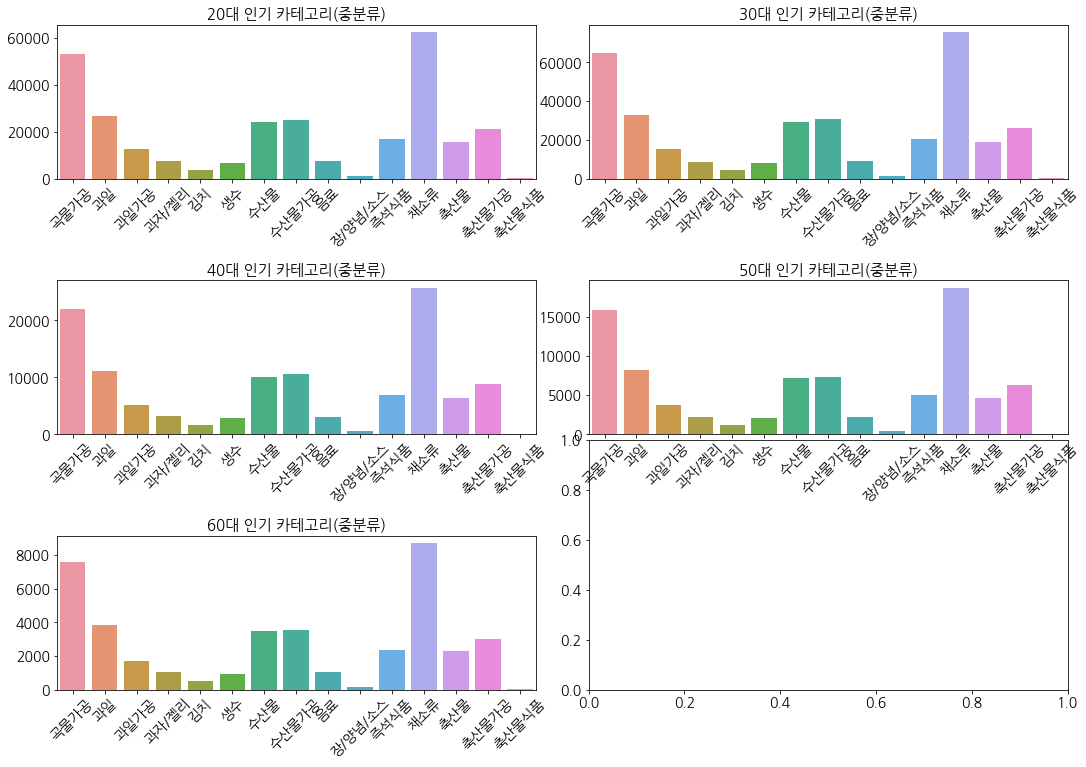

In [30]:
### 가구인원수별 인기 카테고리 파악(대분류)
age_cate2 = df_category.groupby(['AgeGroup','ItemMiddleName'])['idOrder'].count().reset_index().rename(columns={'idOrder':'Count'})
### 중분류 인기 카테고리 파악
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.tight_layout(w_pad=1, h_pad=10)
i = 1
for col in ['20대', '30대', '40대', '50대', '60대']:
    plt.subplot(3, 2, i) 
    graphdf = age_cate2[age_cate2.AgeGroup == col]
    cntsum = graphdf.Count.sum()
#     graphdf['ratio'] = graphdf['Count'].apply(lambda x: round(x / cntsum * 100))
#     display(graphdf)
    sns.barplot(x=graphdf['ItemMiddleName'].values.tolist(), y=graphdf['Count'].values.tolist())
    plt.xticks(rotation=45)
    plt.title("{} 인기 카테고리(중분류)".format(col), fontsize=15)
    i += 1

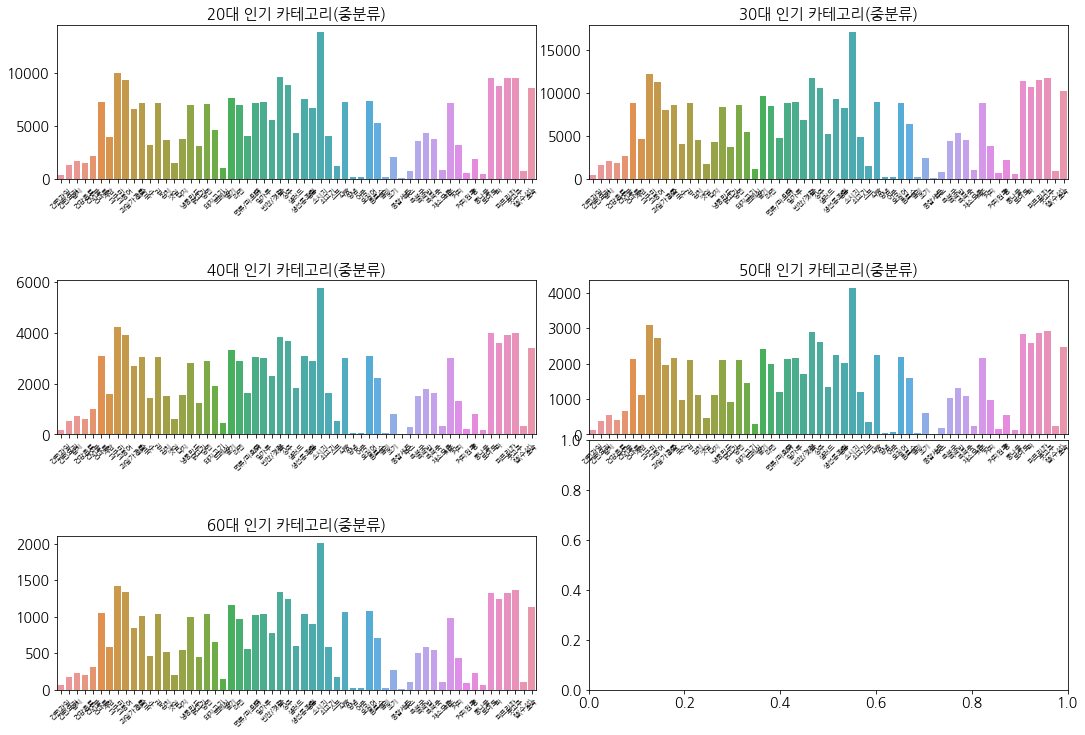

In [31]:
### 가구인원수별 인기 카테고리 파악(대분류)
age_cate2 = df_category.groupby(['AgeGroup','ItemSmallName'])['idOrder'].count().reset_index().rename(columns={'idOrder':'Count'})
### 중분류 인기 카테고리 파악
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.tight_layout(w_pad=1, h_pad=10)
i = 1
for col in ['20대', '30대', '40대', '50대', '60대']:
    plt.subplot(3, 2, i) 
    graphdf = age_cate2[age_cate2.AgeGroup == col]
    cntsum = graphdf.Count.sum()
#     graphdf['ratio'] = graphdf['Count'].apply(lambda x: round(x / cntsum * 100))
#     display(graphdf)
    sns.barplot(x=graphdf['ItemSmallName'].values.tolist(), y=graphdf['Count'].values.tolist())
    plt.xticks(rotation=45, fontsize=7)
    plt.title("{} 인기 카테고리(중분류)".format(col), fontsize=15)
    i += 1

<AxesSubplot:xlabel='ItemLargeName', ylabel='count'>

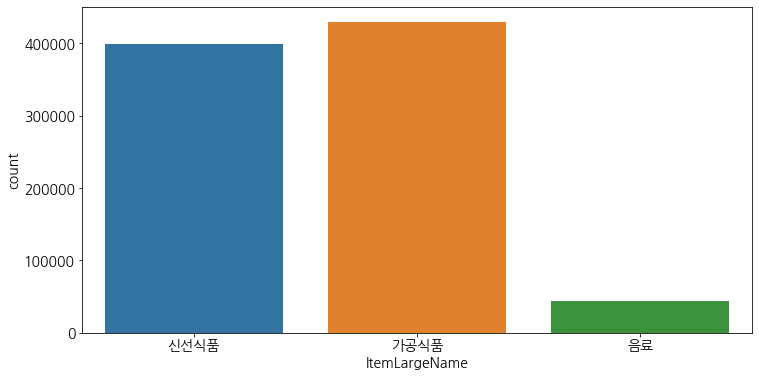

In [32]:
### 대분류 분포 확인
sns.countplot(data=df_category, x='ItemLargeName')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '수산물'),
  Text(1, 0, '채소류'),
  Text(2, 0, '과일'),
  Text(3, 0, '과일가공'),
  Text(4, 0, '축산물'),
  Text(5, 0, '곡물가공'),
  Text(6, 0, '수산물가공'),
  Text(7, 0, '축산물가공'),
  Text(8, 0, '과자/젤리'),
  Text(9, 0, '음료'),
  Text(10, 0, '즉석식품'),
  Text(11, 0, '생수'),
  Text(12, 0, '김치'),
  Text(13, 0, '장/양념/소스'),
  Text(14, 0, '축산물식품')])

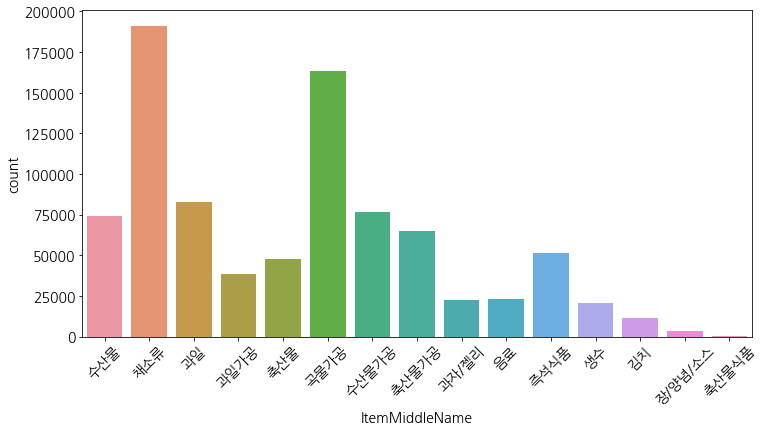

In [33]:
### 중분류 분포 확인
sns.countplot(data=df_category, x='ItemMiddleName')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 [Text(0, 0, '고등어'),
  Text(1, 0, '파프리카'),
  Text(2, 0, '상추'),
  Text(3, 0, '오징어'),
  Text(4, 0, '조기'),
  Text(5, 0, '토마토'),
  Text(6, 0, '딸기'),
  Text(7, 0, '풋고추'),
  Text(8, 0, '반찬/젓갈'),
  Text(9, 0, '돼지고기'),
  Text(10, 0, '호박'),
  Text(11, 0, '깻잎'),
  Text(12, 0, '사과'),
  Text(13, 0, '쇠고기'),
  Text(14, 0, '닭고기'),
  Text(15, 0, '고구마'),
  Text(16, 0, '파'),
  Text(17, 0, '낙지'),
  Text(18, 0, '밀가루'),
  Text(19, 0, '김'),
  Text(20, 0, '소시지'),
  Text(21, 0, '당면'),
  Text(22, 0, '샐러드'),
  Text(23, 0, '과자'),
  Text(24, 0, '과일가공품'),
  Text(25, 0, '생선통조림'),
  Text(26, 0, '계란'),
  Text(27, 0, '견과류'),
  Text(28, 0, '면류/파스타'),
  Text(29, 0, '냉동만두'),
  Text(30, 0, '건어물'),
  Text(31, 0, '치즈'),
  Text(32, 0, '미역'),
  Text(33, 0, '라면'

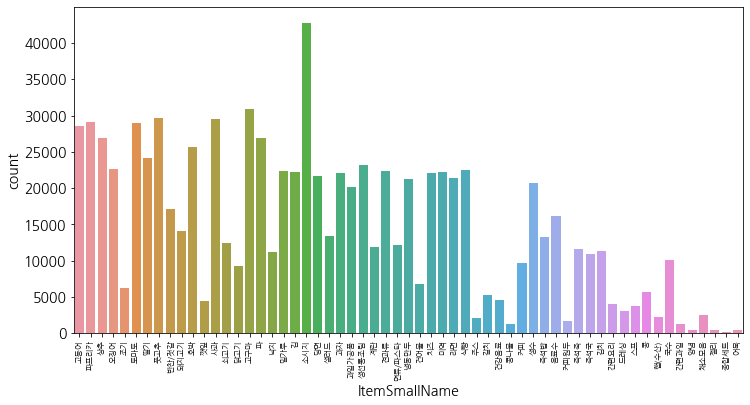

In [34]:
### 소분류 분포 확인
sns.countplot(data=df_category, x='ItemSmallName')
plt.xticks(rotation=90, fontsize = 8)

In [35]:
print('소분류 카테고리 Top5')
display(df_category.groupby("ItemSmallName")['idOrder'].count().reset_index().rename(columns={'idOrder':'Count'}).sort_values(by='Count', ascending=False).head())
print('중분류 카테고리 Top5')
display(df_category.groupby("ItemMiddleName")['idOrder'].count().reset_index().rename(columns={'idOrder':'Count'}).sort_values(by='Count', ascending=False).head())

소분류 카테고리 Top5


,ItemSmallName,Count
32,소시지,42825
7,고구마,30968
56,풋고추,29619
27,사과,29492
55,파프리카,29192


중분류 카테고리 Top5


,ItemMiddleName,Count
11,채소류,190998
0,곡물가공,163321
1,과일,82668
7,수산물가공,76718
6,수산물,73894


### 연령대 + 시간 별 매출

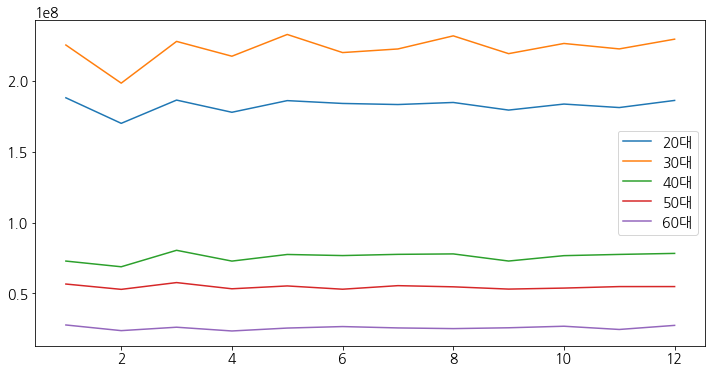

In [36]:
age_time = df_age.groupby(['AgeGroup', 'OrderMonth'])['TotalPrice'].sum().reset_index()
age_time_x = age_time.OrderMonth.unique().tolist()
age_time_20 = age_time[age_time.AgeGroup == '20대'].TotalPrice.values.tolist()
age_time_30 = age_time[age_time.AgeGroup == '30대'].TotalPrice.values.tolist()
age_time_40 = age_time[age_time.AgeGroup == '40대'].TotalPrice.values.tolist()
age_time_50 = age_time[age_time.AgeGroup == '50대'].TotalPrice.values.tolist()
age_time_60 = age_time[age_time.AgeGroup == '60대'].TotalPrice.values.tolist()

plt.plot(age_time_x, age_time_20)
plt.plot(age_time_x, age_time_30)
plt.plot(age_time_x, age_time_40)
plt.plot(age_time_x, age_time_50)
plt.plot(age_time_x, age_time_60)
plt.legend(['20대', '30대', '40대', '50대', '60대']) 
plt.show()

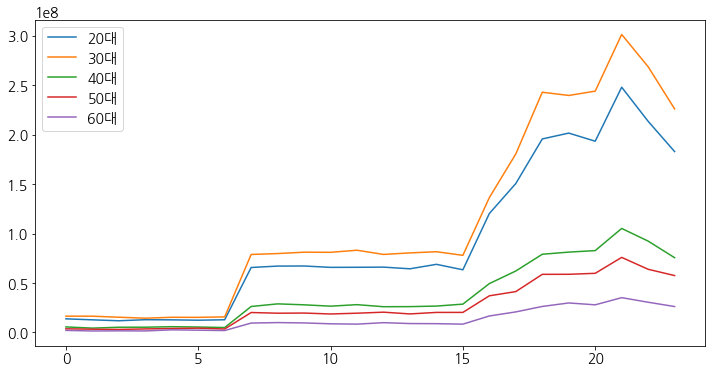

In [37]:
age_time = df_age.groupby(['AgeGroup', 'OrderHour'])['TotalPrice'].sum().reset_index()
age_time_x = age_time.OrderHour.unique().tolist()
age_time_20 = age_time[age_time.AgeGroup == '20대'].TotalPrice.values.tolist()
age_time_30 = age_time[age_time.AgeGroup == '30대'].TotalPrice.values.tolist()
age_time_40 = age_time[age_time.AgeGroup == '40대'].TotalPrice.values.tolist()
age_time_50 = age_time[age_time.AgeGroup == '50대'].TotalPrice.values.tolist()
age_time_60 = age_time[age_time.AgeGroup == '60대'].TotalPrice.values.tolist()

plt.plot(age_time_x, age_time_20)
plt.plot(age_time_x, age_time_30)
plt.plot(age_time_x, age_time_40)
plt.plot(age_time_x, age_time_50)
plt.plot(age_time_x, age_time_60)
plt.legend(['20대', '30대', '40대', '50대', '60대']) 
plt.show()

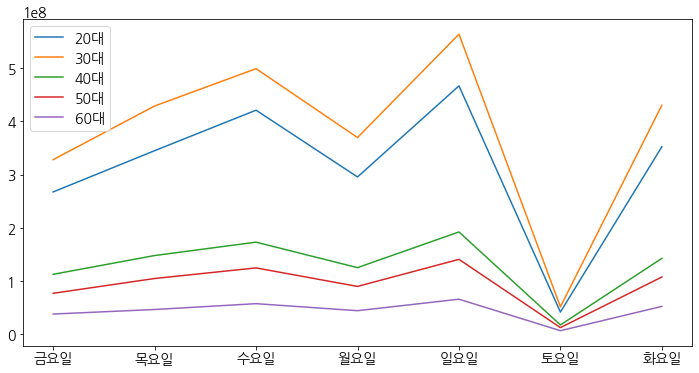

In [38]:
age_time = df_age.groupby(['AgeGroup', 'OrderDow'])['TotalPrice'].sum().reset_index()
age_time_x = age_time.OrderDow.unique().tolist()
age_time_20 = age_time[age_time.AgeGroup == '20대'].TotalPrice.values.tolist()
age_time_30 = age_time[age_time.AgeGroup == '30대'].TotalPrice.values.tolist()
age_time_40 = age_time[age_time.AgeGroup == '40대'].TotalPrice.values.tolist()
age_time_50 = age_time[age_time.AgeGroup == '50대'].TotalPrice.values.tolist()
age_time_60 = age_time[age_time.AgeGroup == '60대'].TotalPrice.values.tolist()

plt.plot(age_time_x, age_time_20)
plt.plot(age_time_x, age_time_30)
plt.plot(age_time_x, age_time_40)
plt.plot(age_time_x, age_time_50)
plt.plot(age_time_x, age_time_60)
plt.legend(['20대', '30대', '40대', '50대', '60대']) 
plt.show()

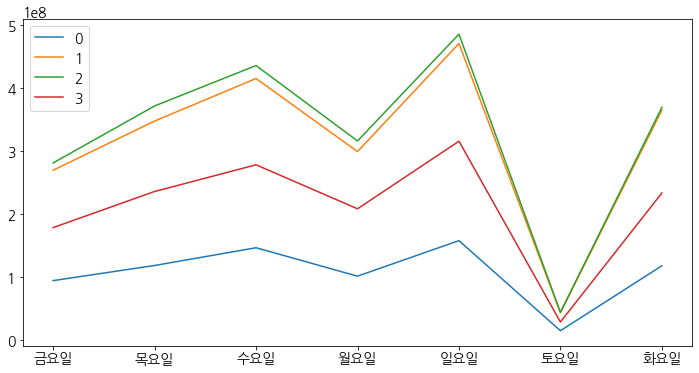

In [39]:
age_time = df_age.groupby(['FamilyCount', 'OrderDow'])['TotalPrice'].sum().reset_index()
age_time_x = age_time.OrderDow.unique().tolist()
age_time_20 = age_time[age_time.FamilyCount == 0].TotalPrice.values.tolist()
age_time_30 = age_time[age_time.FamilyCount == 1].TotalPrice.values.tolist()
age_time_40 = age_time[age_time.FamilyCount == 2].TotalPrice.values.tolist()
age_time_50 = age_time[age_time.FamilyCount == 3].TotalPrice.values.tolist()

plt.plot(age_time_x, age_time_20)
plt.plot(age_time_x, age_time_30)
plt.plot(age_time_x, age_time_40)
plt.plot(age_time_x, age_time_50)
plt.legend([0, 1,2, 3]) 
plt.show()

In [40]:
usertotal = df.groupby('idUser').Price.sum().reset_index().rename(columns={'Price': 'Total'})
usertotal.sort_values(by='Total', ascending=False).head(30).idUser.values.tolist()

['U12625',
 'U10917',
 'U12938',
 'U12811',
 'U12190',
 'U12448',
 'U12790',
 'U12624',
 'U10009',
 'U10993',
 'U12329',
 'U10466',
 'U10991',
 'U11256',
 'U10348',
 'U12192',
 'U11166',
 'U12580',
 'U12652',
 'U10986',
 'U10279',
 'U11589',
 'U12006',
 'U11086',
 'U10430',
 'U12189',
 'U12528',
 'U11740',
 'U11494',
 'U10902']

### 매년 신규고객 수 확인 및 신규 고객 매출 차지 비율

In [46]:
df

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,OrderDate,OrderYear,OrderYearMonth,OrderMonth,...,PriceMax,time,DeliveryDate,DeliveryYear,DeliveryMonth,DeliveryDay,DeliveryHour,DeliveryMinute,DeliverySecond,DeliveryDow
0,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2210012,2510,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,2650,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
1,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2340032,2870,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,2900,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
2,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2320050,3350,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,3760,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
3,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2230012,9680,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,9770,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
4,U10001,U10001-O2020-1002,2020-07-23 22:35:08,P2250010,1240,2020-07-25 04:54:00,2020-07-23,2020,2020-07,7,...,1330,04:54:00,2020-07-25,2020,7,23,4,35,8,토요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872042,U13000,U13000-O2022-1022,2022-12-04 18:14:16,P1420050,11500,2022-12-05 04:11:00,2022-12-04,2022,2022-12,12,...,12320,04:11:00,2022-12-05,2022,12,4,4,14,16,월요일
872043,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1410042,7050,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,7230,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일
872044,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1130024,4190,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,4460,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일
872045,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1620039,12230,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,13020,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일


In [49]:
year_user = df.groupby(['idUser','OrderYear']).Price.sum().reset_index()
year_user.head()

,idUser,OrderYear,Price
0,U10001,2020,332960
1,U10001,2021,742810
2,U10001,2022,657330
3,U10002,2020,315570
4,U10002,2021,702770


In [66]:
user_pivot = year_user.pivot(index='idUser', columns='OrderYear', values='Price')
user_pivot

OrderYear,2020,2021,2022
idUser,,,
U10001,332960.0,742810.0,657330.0
U10002,315570.0,702770.0,1176470.0
U10003,467320.0,448040.0,1424110.0
U10004,393790.0,927520.0,1149670.0
U10005,NaN,846140.0,1247880.0
...,...,...,...
U12996,290470.0,837670.0,1089890.0
U12997,485100.0,950010.0,945560.0
U12998,437340.0,958720.0,1294960.0


In [67]:
### 결측치 다 0으로 바꿈 왜냐하면 해당 년도 구매 x
user_pivot.fillna(0, inplace=True)
user_pivot.reset_index(inplace=True)
# user_pivot.reset_index(inplace=True,drop=True)
user_pivot

OrderYear,idUser,2020,2021,2022
0,U10001,332960.0,742810.0,657330.0
1,U10002,315570.0,702770.0,1176470.0
2,U10003,467320.0,448040.0,1424110.0
3,U10004,393790.0,927520.0,1149670.0
4,U10005,0.0,846140.0,1247880.0
...,...,...,...,...
2995,U12996,290470.0,837670.0,1089890.0
2996,U12997,485100.0,950010.0,945560.0
2997,U12998,437340.0,958720.0,1294960.0
2998,U12999,415650.0,928350.0,1523210.0


In [73]:
user_pivot['가입년도'] = 2020
for i in range(len(user_pivot)):
    if user_pivot.loc[i,2020] == 0:
        if user_pivot.loc[i,2021] == 0:
            user_pivot.loc[i,'가입년도'] = 2022
        else:
            user_pivot.loc[i,'가입년도'] = 2021
user_pivot

OrderYear,idUser,2020,2021,2022,가입년도
0,U10001,332960.0,742810.0,657330.0,2020
1,U10002,315570.0,702770.0,1176470.0,2020
2,U10003,467320.0,448040.0,1424110.0,2020
3,U10004,393790.0,927520.0,1149670.0,2020
4,U10005,0.0,846140.0,1247880.0,2021
...,...,...,...,...,...
2995,U12996,290470.0,837670.0,1089890.0,2020
2996,U12997,485100.0,950010.0,945560.0,2020
2997,U12998,437340.0,958720.0,1294960.0,2020
2998,U12999,415650.0,928350.0,1523210.0,2020


In [83]:
lst = []
for ycol in [2020,2021,2022]:
    dic = {}
    dic['년도'] = ycol
    dic['전체매출'] = int(user_pivot[ycol].sum())
    dic['기존고객 매출'] = int(user_pivot[user_pivot['가입년도'] != ycol][ycol].sum())
    dic['신규고객 매출'] = int(user_pivot[user_pivot['가입년도'] == ycol][ycol].sum())
    lst.append(dic)

ldf = pd.DataFrame(lst)
ldf['기존고객 매출 비율'] = ldf['기존고객 매출'] / ldf['전체매출']
ldf['신규고객 매출 비율'] = ldf['신규고객 매출'] / ldf['전체매출']
ldf

,년도,전체매출,기존고객 매출,신규고객 매출,기존고객 매출 비율,신규고객 매출 비율
0,2020,1000518450,0,1000518450,0.000000,1.000000
1,2021,2495177160,2118807560,376369600,0.849161,0.150839
2,2022,3239693430,3213242160,26451270,0.991835,0.008165


In [86]:
year_usercnt = []
for ycol in [2020,2021,2022]:
    dic = {}
    dic['년도'] = ycol
    dic['신규 고객 수'] = len(user_pivot[user_pivot.가입년도 == ycol])
    year_usercnt.append(dic)
year_usercnt = pd.DataFrame(year_usercnt)
year_usercnt

,년도,신규 고객 수
0,2020,2550
1,2021,428
2,2022,22


### 가족구성원별 매출액

,FamilyCount,Price
0,0,748003890
1,1,2208990340
2,2,2302134690
3,3,1476260120


<AxesSubplot:xlabel='FamilyCount'>

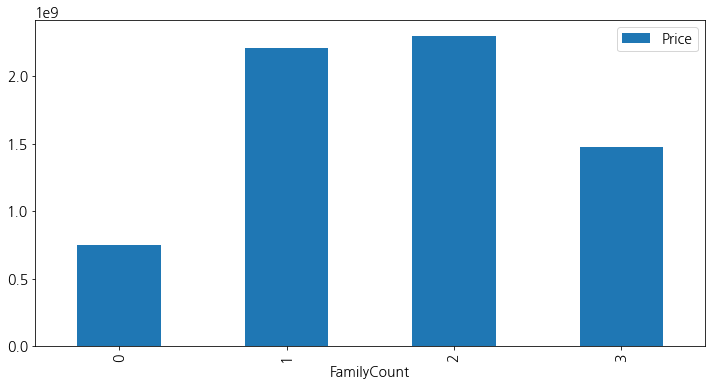

In [96]:
fcnt_df = df.groupby('FamilyCount').Price.sum().reset_index()
display(fcnt_df)
fcnt_df.plot(x='FamilyCount', y='Price', kind='bar')

In [99]:
df_total.groupby('FamilyCount')['주문별 객단가'].mean()

FamilyCount
0    36073.872847
1    35935.103192
2    35838.833535
3    35944.262797
Name: 주문별 객단가, dtype: float64

### 연령대별 카테고리 추세선 만들기

In [104]:
age_large = df_category.groupby(['AgeGroup', 'ItemLargeName']).agg({'Price':'sum', 'idOrder':'count'}).reset_index().rename(columns = {'Price':'TotalPrice', 'idOrder':'Count'})
age_large

,AgeGroup,ItemLargeName,TotalPrice,Count
0,20대,가공식품,1133402360,139203
1,20대,신선식품,973509080,130087
2,20대,음료,82414070,14110
3,30대,가공식품,1388389610,170827
4,30대,신선식품,1180953760,157637
5,30대,음료,102024080,17456
6,40대,가공식품,469558680,58012
7,40대,신선식품,405155030,53872
8,40대,음료,35055630,5980
9,50대,가공식품,337318250,41493


['가공식품', '신선식품', '음료']


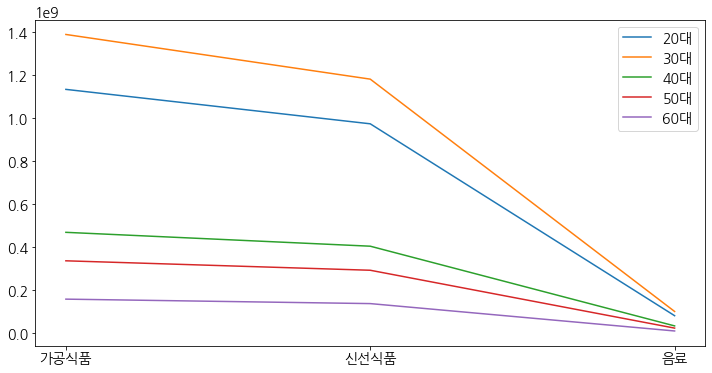

In [109]:
from matplotlib import pyplot as plt
x_values = age_large.ItemLargeName.unique().tolist()
print(x_values)
y_values_1 = age_large[age_large.AgeGroup=='20대'].TotalPrice.values.tolist()
y_values_2 = age_large[age_large.AgeGroup=='30대'].TotalPrice.values.tolist()
y_values_3 = age_large[age_large.AgeGroup=='40대'].TotalPrice.values.tolist()
y_values_4 = age_large[age_large.AgeGroup=='50대'].TotalPrice.values.tolist()
y_values_5 = age_large[age_large.AgeGroup=='60대'].TotalPrice.values.tolist()
plt.plot(x_values, y_values_1)
plt.plot(x_values, y_values_2)
plt.plot(x_values, y_values_3)
plt.plot(x_values, y_values_4)
plt.plot(x_values, y_values_5)
plt.legend(['20대','30대','40대','50대','60대'])
plt.show()

### 연도별 대분류 매출

In [116]:
df_category = df[['idUser', 'idOrder', 'OrderDT', 'OrderYear', 'ItemCode', 'Price', 'Gender',
       'Age', 'FamilyCount', 'MemberYN', 'UserClass', 'AgeGroup',
       'ItemLargeName', 'ItemMiddleName', 'ItemSmallName', 'ItemName']]
year_large = df_category.groupby(['OrderYear','ItemLargeName']).agg({'Price':'sum', 'idOrder':'count'}).reset_index()
year_large

,OrderYear,ItemLargeName,Price,idOrder
0,2020,가공식품,122194860,10871
1,2020,신선식품,875075560,122388
2,2020,음료,3248030,587
3,2021,가공식품,1349598590,176019
4,2021,신선식품,1034634170,138435
5,2021,음료,110944400,19508
6,2022,가공식품,2016181300,242344
7,2022,신선식품,1081968540,138279
8,2022,음료,141543590,23616


['2020년', '2021년', '2022년']


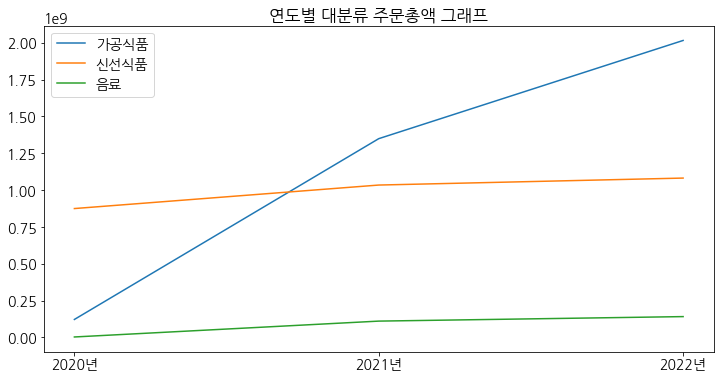

In [122]:
from matplotlib import pyplot as plt
x_values = [str(x) + '년' for x in year_large.OrderYear.unique().tolist()]
print(x_values)
y_values_1 = year_large[year_large.ItemLargeName=='가공식품'].Price.values.tolist()
y_values_2 = year_large[year_large.ItemLargeName=='신선식품'].Price.values.tolist()
y_values_3 = year_large[year_large.ItemLargeName=='음료'].Price.values.tolist()
plt.plot(x_values, y_values_1)
plt.plot(x_values, y_values_2)
plt.plot(x_values, y_values_3)
plt.legend(['가공식품','신선식품','음료'])
plt.title('연도별 대분류 주문총액 그래프')
plt.show()

['2020년', '2021년', '2022년']


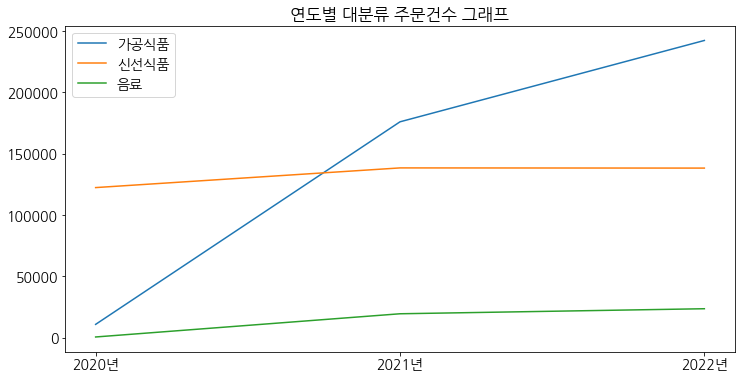

In [121]:
x_values = [str(x) + '년' for x in year_large.OrderYear.unique().tolist()]
print(x_values)
y_values_1 = year_large[year_large.ItemLargeName=='가공식품'].idOrder.values.tolist()
y_values_2 = year_large[year_large.ItemLargeName=='신선식품'].idOrder.values.tolist()
y_values_3 = year_large[year_large.ItemLargeName=='음료'].idOrder.values.tolist()
plt.plot(x_values, y_values_1)
plt.plot(x_values, y_values_2)
plt.plot(x_values, y_values_3)
plt.legend(['가공식품','신선식품','음료'])
plt.title('연도별 대분류 주문건수 그래프')
plt.show()

### 30의 여성의 경우, 가족 구성원이 1 이상일 때 구매력이 높아진다?

In [140]:
df_category

,idUser,idOrder,OrderDT,OrderYear,ItemCode,Price,Gender,Age,FamilyCount,MemberYN,UserClass,AgeGroup,ItemLargeName,ItemMiddleName,ItemSmallName,ItemName
0,U10001,U10001-O2020-1001,2020-03-13 23:29:23,2020,P2210012,2510,남성,64,3,Y,신규 고객,60대,신선식품,수산물,고등어,[고등어초절임 100g] 시메사바 필렛 고등어초회 고등어회 홈마카세 금상어가
1,U10001,U10001-O2020-1001,2020-03-13 23:29:23,2020,P2340032,2870,남성,64,3,Y,신규 고객,60대,신선식품,채소류,파프리카,[프레시팜] 가정용 봉지 파프리카 특품 2입 1봉지
2,U10001,U10001-O2020-1001,2020-03-13 23:29:23,2020,P2320050,3350,남성,64,3,Y,신규 고객,60대,신선식품,채소류,상추,[맛다름]양상추 1통
3,U10001,U10001-O2020-1001,2020-03-13 23:29:23,2020,P2230012,9680,남성,64,3,Y,신규 고객,60대,신선식품,수산물,오징어,GS Fresh 매콤한 팔당오징어 420g
4,U10001,U10001-O2020-1002,2020-07-23 22:35:08,2020,P2250010,1240,남성,64,3,Y,신규 고객,60대,신선식품,수산물,조기,참조기(200~400g)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872042,U13000,U13000-O2022-1022,2022-12-04 18:14:16,2022,P1420050,11500,여성,42,1,Y,이탈 고객,40대,가공식품,수산물가공,미역,[22년설날]완도 건어물 실속선물세트 1호(다시마 100g 2봉 미역 100g)
872043,U13000,U13000-O2022-1023,2022-03-01 02:54:31,2022,P1410042,7050,여성,42,1,Y,이탈 고객,40대,가공식품,수산물가공,김,CJ 햇바삭명가김 재래김 4G*16
872044,U13000,U13000-O2022-1023,2022-03-01 02:54:31,2022,P1130024,4190,여성,42,1,Y,이탈 고객,40대,가공식품,곡물가공,면류/파스타,CJ백설 제일제면소(칼국수)900g 국수 소면 소바 칼국수 스파게티
872045,U13000,U13000-O2022-1023,2022-03-01 02:54:31,2022,P1620039,12230,여성,42,1,Y,이탈 고객,40대,가공식품,즉석식품,즉석밥,CJ 햇반 아산맑은쌀밥 210g12입


In [143]:
df_customer

,idUser,Gender,Age,FamilyCount,MemberYN,Monetary,UserClass,AgeGroup
0,U10001,남성,64,3,Y,1743760,신규 고객,60대
1,U10002,남성,30,1,Y,2201660,잠재충성 고객,30대
2,U10003,여성,28,2,N,2351550,VIP,20대
3,U10004,남성,38,3,Y,2470980,관심필요 고객,30대
4,U10005,여성,23,2,Y,2104870,이탈 고객,20대
...,...,...,...,...,...,...,...,...
2995,U12996,여성,34,2,Y,2221920,신규 고객,30대
2996,U12997,남성,45,2,N,2392990,떠나간 VIP,40대
2997,U12998,여성,30,0,Y,2704160,떠나간 VIP,30대
2998,U12999,여성,36,0,Y,2881640,떠나간 VIP,30대


In [148]:
df_user_year = df_category.groupby(['idUser', 'OrderYear']).Price.sum().reset_index()
df_user_year = df_user_year[df_user_year.OrderYear == 2022]
df_user_year.reset_index(inplace=True, drop=True)
df_user_year = pd.merge(df_user_year, df_customer[['idUser', 'Gender', 'AgeGroup', 'FamilyCount']])
df_user_year

,idUser,OrderYear,Price,Gender,AgeGroup,FamilyCount
0,U10001,2022,657330,남성,60대,3
1,U10002,2022,1176470,남성,30대,1
2,U10003,2022,1424110,여성,20대,2
3,U10004,2022,1149670,남성,30대,3
4,U10005,2022,1247880,여성,20대,2
...,...,...,...,...,...,...
2995,U12996,2022,1089890,여성,30대,2
2996,U12997,2022,945560,남성,40대,2
2997,U12998,2022,1294960,여성,30대,0
2998,U12999,2022,1523210,여성,30대,0


In [153]:
df_user_30 = df_user_year[(df_user_year.AgeGroup == '30대')&(df_user_year.Gender == '여성')].reset_index(drop=True)
df_user_30['1 이상'] = df_user_30['FamilyCount'].apply(lambda x : 1 if x >=1 else 0)
df_user_30

,idUser,OrderYear,Price,Gender,AgeGroup,FamilyCount,1 이상
0,U10008,2022,1537550,여성,30대,3,1
1,U10010,2022,1076800,여성,30대,2,1
2,U10013,2022,901910,여성,30대,2,1
3,U10015,2022,1219140,여성,30대,2,1
4,U10019,2022,1718850,여성,30대,3,1
...,...,...,...,...,...,...,...
754,U12989,2022,848200,여성,30대,3,1
755,U12995,2022,1388640,여성,30대,1,1
756,U12996,2022,1089890,여성,30대,2,1
757,U12998,2022,1294960,여성,30대,0,0


In [157]:
female_30 = df_user_30.groupby('1 이상').Price.mean().reset_index().rename(columns={'1 이상': '가족 구성원 1 이상 여부', "Price" : '고객 평균 지출 비용'})
female_30['고객 평균 지출 비용'] = female_30['고객 평균 지출 비용'].apply(lambda x: int(x))
female_30

,가족 구성원 1 이상 여부,고객 평균 지출 비용
0,0,1126171
1,1,1082370


In [162]:
df_4060 = df[df.AgeGroup.isin(['40대','50대', '60대'])]

year_4060 = df_4060.groupby(['OrderYear','ItemLargeName']).agg({'idOrder':'count', 'Price':'sum'}).reset_index()
year_4060

,OrderYear,ItemLargeName,idOrder,Price
0,2020,가공식품,3046,33867010
1,2020,신선식품,34187,246606880
2,2020,음료,161,900410
3,2021,가공식품,49075,374347670
4,2021,신선식품,38655,288390520
5,2021,음료,5422,30872540
6,2022,가공식품,67083,557968100
7,2022,신선식품,38536,302218030
8,2022,음료,6562,39524920


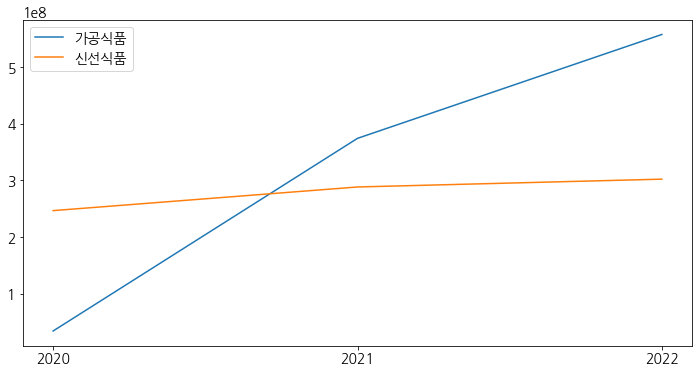

In [164]:
age_year_x = [str(x) for x in year_4060.OrderYear.unique().tolist()]
age_year_1 = year_4060[year_4060.ItemLargeName == '가공식품'].Price.values.tolist()
age_year_2 = year_4060[year_4060.ItemLargeName == '신선식품'].Price.values.tolist()
plt.plot(age_year_x, age_year_1)
plt.plot(age_year_x, age_year_2)
plt.legend(['가공식품', '신선식품']) 
plt.show()

In [ ]:
0